In [1]:
#Can we predict the rating (positive or negative) based on Genre, Platform and Runtime for Shows?  

In [2]:
#Exploratory Data Analysis for streaming data from all platforms
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading in data again for fresh start

In [8]:
df1 = pd.read_csv("C:/Users/lesle/Desktop/All Streaming Data 1.29.23 (1).csv")

In [10]:
df1.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,Disney,tm19438,The Princess Bride,MOVIE,"In this enchantingly cracked fairy tale, the b...",1987,PG,99,"fantasy, family, romance",['US'],...,fantasy,family,romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disney,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"animation, comedy",['US'],...,animation,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disney,ts15377,America's Funniest Home Videos,SHOW,America's Funniest Home Videos is the longest-...,1989,TV-PG,49,"animation, reality, comedy",['US'],...,animation,reality,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disney,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"animation, comedy, family, fantasy, scifi","['FR', 'GB', 'US', 'CA']",...,animation,comedy,family,fantasy,scifi,NaN,NaN,NaN,NaN,NaN
4,Disney,tm38852,Horton Hears a Who!,MOVIE,"One day, Horton the elephant hears a cry from ...",2008,G,86,"fantasy, family, drama, romance, comedy, music...",['US'],...,fantasy,family,drama,romance,comedy,music,animation,NaN,NaN,NaN


In [11]:
df1.shape

(19654, 26)

In [13]:
#Subsetting the data

In [14]:
df2 = df1.drop (['title', 'description', 'age_certification', 'genres', 'production_countries', 'tmdb_popularity','tmdb_score','genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9','genre10', 'seasons', 'imdb_votes', 'imdb_id'], axis=1)

In [15]:
df2.head()

,platform,id,type,release_year,runtime,imdb_score,genre1
0,Disney,tm19438,MOVIE,1987,99,8.0,fantasy
1,Disney,ts20711,SHOW,1989,27,8.7,animation
2,Disney,ts15377,SHOW,1989,49,6.2,animation
3,Disney,ts22130,SHOW,1998,21,6.3,animation
4,Disney,tm38852,MOVIE,2008,86,6.8,fantasy


In [16]:
df2.shape

(19654, 7)

In [17]:
#Subsetting data for shows

In [18]:
df3 = df2.loc[df2['type']=='SHOW']

In [19]:
df3.head()

,platform,id,type,release_year,runtime,imdb_score,genre1
1,Disney,ts20711,SHOW,1989,27,8.7,animation
2,Disney,ts15377,SHOW,1989,49,6.2,animation
3,Disney,ts22130,SHOW,1998,21,6.3,animation
5,Disney,ts21940,SHOW,2010,23,6.6,action
6,Disney,ts21756,SHOW,2009,22,6.3,comedy


In [20]:
df3.shape

(5208, 7)

In [21]:
#Viewing and droppings NAs

In [22]:
df3.isnull().sum()

platform          0
id                0
type              0
release_year      0
runtime           0
imdb_score      492
genre1            0
dtype: int64

In [23]:
#So, when the NAs are dropped first using the dropna, it removes all rows that have NA - this means that the variables I don't need must be dropped first

In [24]:
df3.dropna(inplace=True)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1665326329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [25]:
df3.isnull().sum()

platform        0
id              0
type            0
release_year    0
runtime         0
imdb_score      0
genre1          0
dtype: int64

In [26]:
df3.count

<bound method DataFrame.count of       platform        id  type  release_year  runtime  imdb_score     genre1
1       Disney   ts20711  SHOW          1989       27         8.7  animation
2       Disney   ts15377  SHOW          1989       49         6.2  animation
3       Disney   ts22130  SHOW          1998       21         6.3  animation
5       Disney   ts21940  SHOW          2010       23         6.6     action
6       Disney   ts21756  SHOW          2009       22         6.3     comedy
...        ...       ...   ...           ...      ...         ...        ...
19643     Hulu  ts322832  SHOW          2021       40         7.4    reality
19645     Hulu  ts330888  SHOW          2021       24         7.0  animation
19646     Hulu  ts289327  SHOW          2021       43         6.9      sport
19649     Hulu  ts290117  SHOW          2021       11         7.3     comedy
19651     Hulu  ts317705  SHOW          2021       42         4.7    reality

[4716 rows x 7 columns]>

In [27]:
#This leaves 4716 rows of data - close to susan's 4680

In [30]:
df3['platform'].value_counts()

Netflix    1939
Hulu       1250
Amazon     1166
Disney      361
Name: platform, dtype: int64

Text(0.5, 0, 'Platform')

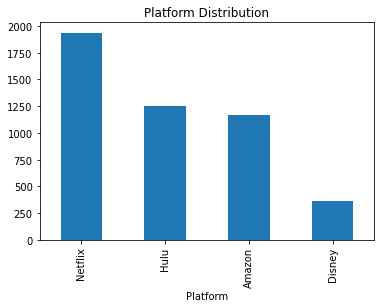

In [29]:
#Distribution of shows on each platform
Platform = df3['platform'].value_counts().plot(kind='bar')
Platform.set_title("Platform Distribution")
Platform.set_xlabel("Platform")

In [74]:
#Count by genre 
df3.genre1.value_counts()

drama            1025
comedy            851
documentation     529
scifi             510
animation         498
reality           439
action            363
crime             201
thriller           85
war                50
[]                 35
family             30
romance            25
western            14
music              13
history            13
horror             12
fantasy            12
sport              11
Name: genre1, dtype: int64

In [32]:
#Checking out the mean of the imdb score
df3.loc[:,'imdb_score'].mean()

7.055067854113655

In [22]:
#The mean is still off from Susan's 7.06

In [33]:
#Recoding variables

In [35]:
def rating_df (series):
    if series == "imdb_score":
        return "0"
    if series <= 6.9:
        return "Negative"
    if series >= 7.0:
        return "Positive"
df3["rating_df"] = df3["imdb_score"].apply(rating_df)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1708622194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rating_df"] = df3["imdb_score"].apply(rating_df)


In [36]:
def rating_df1 (series):
    if series == "Rating":
        return "0"
    if series == "Positive":
        return "1"
    if series == "Negative":
        return "2"
df3["rating_df1"] = df3["rating_df"].apply(rating_df1)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1268006130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["rating_df1"] = df3["rating_df"].apply(rating_df1)


In [37]:
df3.groupby('rating_df1')['genre1'].count()

rating_df1
1    2814
2    1902
Name: genre1, dtype: int64

In [38]:
#recode platforms
def platformR (series):
    if series == "platform":
        return "0"
    if series == "Amazon":
        return "1"
    if series == "Netflix":
        return "2"
    if series == "Hulu":
        return "3"
    if series == "Disney":
        return "4"
df3["platformR"] = df3["platform"].apply(platformR)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\3611984171.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["platformR"] = df3["platform"].apply(platformR)


In [39]:
#recode genres
def genreR (series):
  if series == "genre1":
    return "0"
  if series == "fantasy": 
    return "1"
  if series == "animation": 
    return "2"
  if series == "action":
    return "3"
  if series == "comedy":
    return "4"
  if series == "scifi":
    return "5"
  if series == "reality":
    return "6"
  if series == "drama":
    return "7"
  if series == "documentation":
    return "8"
  if series == "music":
    return "9"
  if series == "western":
    return "10"
  if series == "family":
    return "11"
  if series == "thriller":
    return "12"
  if series == "romance":
    return "13"
  if series == "crime":
    return "14"
  if series == "horror":
    return "15"
  if series == "history":
    return "16"
  if series == "war":
    return "17"
  if series == "[]":
    return "18"
  if series == "sport":
    return "19"
  if series == 'european':
    return "20"
df3["genreR"] = df3["genre1"].apply(genreR)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1041931906.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["genreR"] = df3["genre1"].apply(genreR)


In [40]:
df3.head()

,platform,id,type,release_year,runtime,imdb_score,genre1,rating_df,rating_df1,platformR,genreR
1,Disney,ts20711,SHOW,1989,27,8.7,animation,Positive,1,4,2
2,Disney,ts15377,SHOW,1989,49,6.2,animation,Negative,2,4,2
3,Disney,ts22130,SHOW,1998,21,6.3,animation,Negative,2,4,2
5,Disney,ts21940,SHOW,2010,23,6.6,action,Negative,2,4,3
6,Disney,ts21756,SHOW,2009,22,6.3,comedy,Negative,2,4,4


In [41]:
df3['genreR'] = df3['genreR'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\3231936955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['genreR'] = df3['genreR'].astype(int)


In [42]:
df3['platformR']=df3['platformR'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1847818915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['platformR']=df3['platformR'].astype(int)


In [43]:
df3.dtypes

platform         object
id               object
type             object
release_year      int64
runtime           int64
imdb_score      float64
genre1           object
rating_df        object
rating_df1       object
platformR         int32
genreR            int32
dtype: object

In [44]:
df3['imdb_score']=df3['imdb_score'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\1010029047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['imdb_score']=df3['imdb_score'].astype(int)


In [45]:
df3['rating_df1']=df3['rating_df1'].astype(int)

C:\Users\lesle\AppData\Local\Temp\ipykernel_35476\4043877885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rating_df1']=df3['rating_df1'].astype(int)


In [46]:
df3.dtypes

platform        object
id              object
type            object
release_year     int64
runtime          int64
imdb_score       int32
genre1          object
rating_df       object
rating_df1       int32
platformR        int32
genreR           int32
dtype: object

In [47]:
#Correlation matrix to show relationship between select variables
corr_matrix = df3[["rating_df1","platformR","genreR","runtime"]].corr()
corr_matrix

,rating_df1,platformR,genreR,runtime
rating_df1,1.000000,0.026727,-0.096440,-0.159456
platformR,0.026727,1.000000,-0.109343,-0.108261
genreR,-0.096440,-0.109343,1.000000,0.393322
runtime,-0.159456,-0.108261,0.393322,1.000000


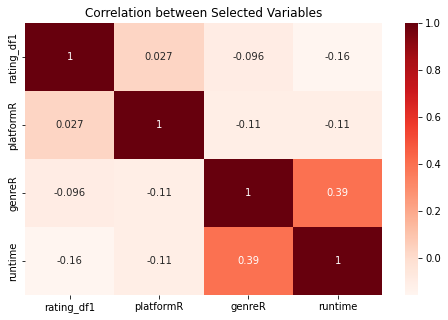

In [65]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

In [48]:
#Can we predict the rating (positive or negative) based on Genre, Platform and Runtime for Shows?  
#There is a negative correlation -0.09 between genre and rating
#There is a negative correlation -0.15 between runtime and rating
#There is a positive correlation 0.39 between genre and runtime
#There is a positive correlation 0.02 between platform and rating

In [67]:
from scipy.stats import norm
from scipy import stats

<AxesSubplot: >

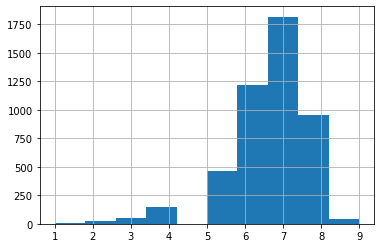

In [68]:
df3['imdb_score'].hist()

In [78]:
# We could do a chi square on runtime and rating to support why we wouldn't add runtime to the ML.  Because that is what's dragging the prediction rating down. (I think)
#Testing assumptions for chi square

In [79]:
#create contingency table

In [80]:
shows_crosstab = pd.crosstab(df3['runtime'], df3['rating_df1'])

In [81]:
shows_crosstab

rating_df1,1,2
runtime,,
0,5,7
1,2,5
2,8,10
3,10,11
4,7,10
...,...,...
131,1,0
141,1,0
153,1,0


In [82]:
#running the independent chi-square
stats.chi2_contingency(shows_crosstab)

(273.3273887880503,
 2.290269165229206e-17,
 103,
 array([[  7.16030534,   4.83969466],
        [  4.17684478,   2.82315522],
        [ 10.74045802,   7.25954198],
        [ 12.53053435,   8.46946565],
        [ 10.1437659 ,   6.8562341 ],
        [ 11.33715013,   7.66284987],
        [ 10.1437659 ,   6.8562341 ],
        [ 12.53053435,   8.46946565],
        [  7.75699746,   5.24300254],
        [  9.54707379,   6.45292621],
        [ 13.72391858,   9.27608142],
        [ 28.64122137,  19.35877863],
        [ 22.67430025,  15.32569975],
        [ 24.46437659,  16.53562341],
        [ 18.49745547,  12.50254453],
        [ 15.51399491,  10.48600509],
        [  7.75699746,   5.24300254],
        [ 13.72391858,   9.27608142],
        [ 13.12722646,   8.87277354],
        [ 20.88422392,  14.11577608],
        [ 26.25445293,  17.74554707],
        [ 82.94020356,  56.05979644],
        [149.7697201 , 101.2302799 ],
        [170.05725191, 114.94274809],
        [218.98600509, 148.01399491],


In [ ]:
#p-value 2.290269165229206e-17
#There is not a statistically significant relationship between runtime and rating

In [69]:
df3['imdb_score'].mean()

6.603265479219678

<AxesSubplot: >

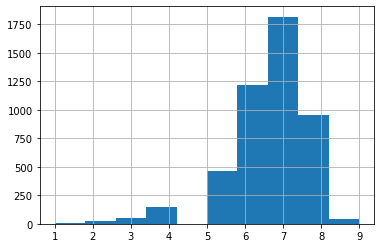

In [54]:
#Checking histogram of imdb score
df3.imdb_score.hist()
#imdb_score is normally distributed along the mean, but there is no significant correlation

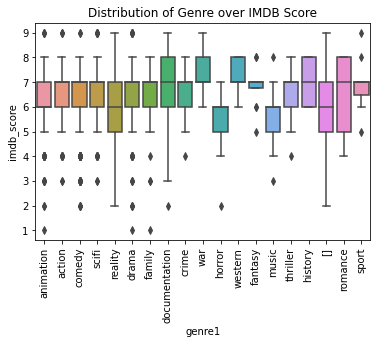

In [66]:
#Plot boxplots to compare dispersion 
sns.boxplot(data=df3,x='genre1',y='imdb_score')
plt.xticks(rotation=90)
plt.title("Distribution of Genre over IMDB Score")
plt.show()

In [58]:
#Supervised machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#determining the x and y variables
x = df3[['platformR','genreR']]
y = df3['rating_df1']
#based on the chi-square, I am going to drop runtime to see if ML accuracy improves. 
#first go at ML with [platformR, genreR, runtime] with accuracy Score: 0.022616662541346533
#second go at ML with [platformR, genreR] with accuracy Score: 0.010905490380019756

In [84]:
#Train Test Split for Goal 2. This is a 60/40 split.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2829, 2) (2829,)
(1887, 2) (1887,)


In [85]:
#create linear regression model 
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [86]:
#Interpreting Supervised Machine Learning Accuracy
predictions = lm.predict(x_test)
predictions

array([1.44298677, 1.43027269, 1.32964807, ..., 1.4440748 , 1.31003294,
       1.39321848])

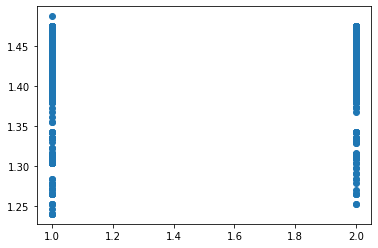

In [87]:
#Creating a scatter plot to view predictions
plt.scatter(y_test, predictions)

In [88]:
#Accuracy Score for if the rating can be predicted by genre, platform or runtime
print("Score:", lm.score(x_test, y_test))

Score: 0.010905490380019756
